In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("train.csv")
weather = pd.read_csv("weatherdata.csv")


weather.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5175 entries, 0 to 5174
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    5175 non-null   object 
 1   temp         5175 non-null   float64
 2   windspeed    4036 non-null   float64
 3   humidity     5175 non-null   float64
 4   precip       5175 non-null   float64
 5   pressure     5041 non-null   float64
 6   conditions   5175 non-null   object 
 7   dailyprecip  5175 non-null   object 
 8   dailysnow    5175 non-null   object 
 9   fog          5175 non-null   int64  
 10  rain         5175 non-null   int64  
 11  snow         5175 non-null   int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 485.3+ KB


In [4]:
min_max_values = weather.agg([np.min, np.max])
print(min_max_values)


               timestamp  temp  windspeed  humidity  precip  pressure  \
min  2016-01-01 00:51:00  -0.9        3.5       9.0    0.00     29.22   
max  2016-07-01 23:51:00  90.0       85.2     100.0    0.73     30.62   

    conditions dailyprecip dailysnow  fog  rain  snow  
min      Clear        0.00      0.00    0     0     0  
max    Unknown           T         T    1     1     1  


/var/folders/6s/jr7682b91l96_19cy2sc2kvw0000gn/T/ipykernel_27800/1288085971.py:1: FutureWarning: The provided callable <function min at 0x10aa2b740> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  min_max_values = weather.agg([np.min, np.max])
/var/folders/6s/jr7682b91l96_19cy2sc2kvw0000gn/T/ipykernel_27800/1288085971.py:1: FutureWarning: The provided callable <function max at 0x10aa2b600> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  min_max_values = weather.agg([np.min, np.max])


In [16]:
train['trip_duration_min'] = train['trip_duration'] / 60
train['trip_duration_hour'] = train['trip_duration_min'] / 60
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])

train['pickup_hour'] = train['pickup_datetime'].dt.hour
train['pickup_day'] = train['pickup_datetime'].dt.dayofweek
train['pickup_month'] = train['pickup_datetime'].dt.month
train['day_of_year'] = train['pickup_datetime'].dt.dayofyear
train['hour_of_year'] = (train['day_of_year'] - 1) * 24 + train['pickup_hour']
train['pickup_day_name'] = train['pickup_day'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday',
    3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})
train['pickup_month_name'] = train['pickup_month'].map({
    1: 'January', 2: 'February',
    3: 'March', 4: 'April', 5: 'May', 6: 'June'
})

weather['datetime'] = pd.to_datetime(weather['timestamp'])
weather['hour'] = weather['datetime'].dt.hour
weather['day_of_year'] = weather['datetime'].dt.dayofyear
weather['hour_of_year'] = (weather['day_of_year'] - 1) * 24 + weather['hour']

weather['temp_C'] = (weather['temp'] - 32) * 5 / 9

In [18]:
train_weather = pd.merge(train, weather, how='inner', on=['hour_of_year'])
train_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692850 entries, 0 to 1692849
Data columns (total 36 columns):
 #   Column              Dtype         
---  ------              -----         
 0   id                  object        
 1   vendor_id           int64         
 2   pickup_datetime     datetime64[ns]
 3   dropoff_datetime    object        
 4   passenger_count     int64         
 5   pickup_longitude    float64       
 6   pickup_latitude     float64       
 7   dropoff_longitude   float64       
 8   dropoff_latitude    float64       
 9   store_and_fwd_flag  object        
 10  trip_duration       int64         
 11  trip_duration_min   float64       
 12  trip_duration_hour  float64       
 13  pickup_hour         int32         
 14  pickup_day          int32         
 15  pickup_month        int32         
 16  day_of_year_x       int32         
 17  hour_of_year        int64         
 18  pickup_day_name     object        
 19  pickup_month_name   object        
 20  ti

In [9]:
train_weather['conditions'].value_counts()

conditions
Clear                  735405
Overcast               431912
Mostly Cloudy          107476
Light Rain             100458
Partly Cloudy           82997
Unknown                 62593
Scattered Clouds        49792
Haze                    42518
Light Snow              36444
Rain                    25221
Heavy Rain               8634
Snow                     7082
Light Freezing Rain      2145
Heavy Snow                173
Name: count, dtype: int64

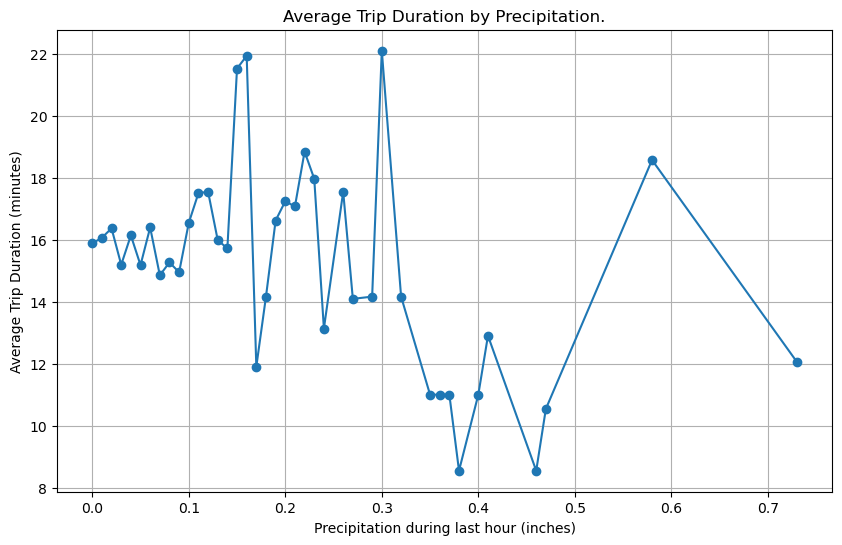

In [23]:
hourly_avg = train_weather.groupby('precip')['trip_duration_min'].mean()
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg.index, hourly_avg, marker='o', linestyle='-')
plt.title('Average Trip Duration by Precipitation.')
plt.xlabel('Precipitation during last hour (inches)')
plt.ylabel('Average Trip Duration (minutes)')
plt.grid(True)
plt.show()

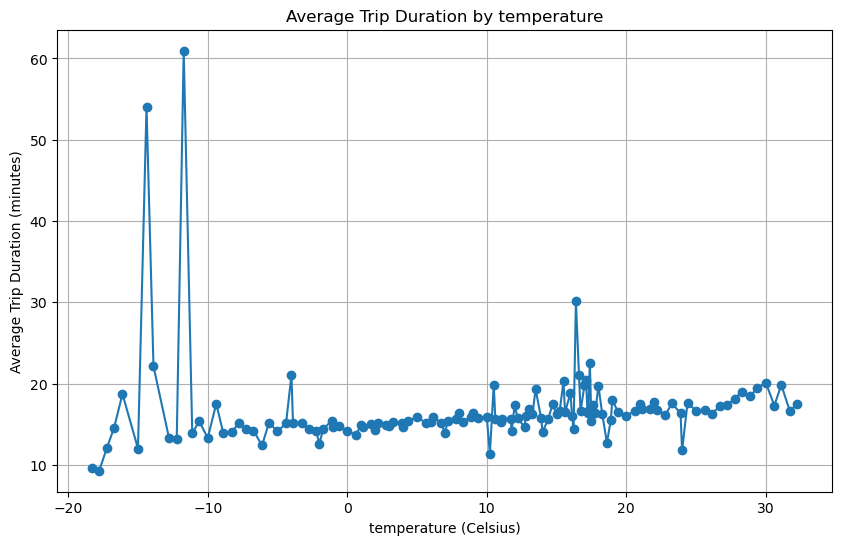

In [20]:
hourly_avg = train_weather.groupby('temp_C')['trip_duration_min'].mean()
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg.index, hourly_avg, marker='o', linestyle='-')
plt.title('Average Trip Duration by temperature')
plt.xlabel('temperature (Celsius)')
plt.ylabel('Average Trip Duration (minutes)')
plt.grid(True)
plt.show()

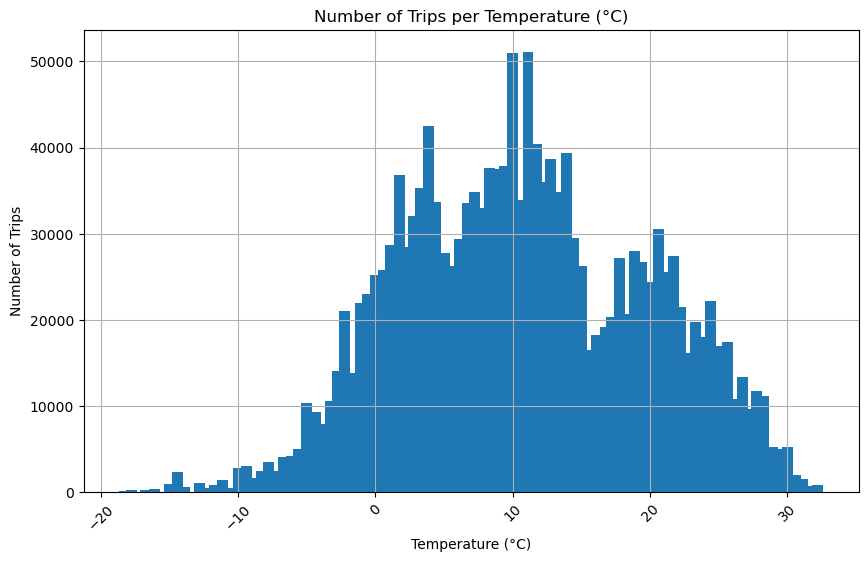

In [ ]:
# Count the number of trips for each temperature
trip_counts = train_weather.groupby('temp_C').size()

# Plot the trip counts using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(trip_counts.index, trip_counts)
plt.title('Number of Trips per Temperature (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

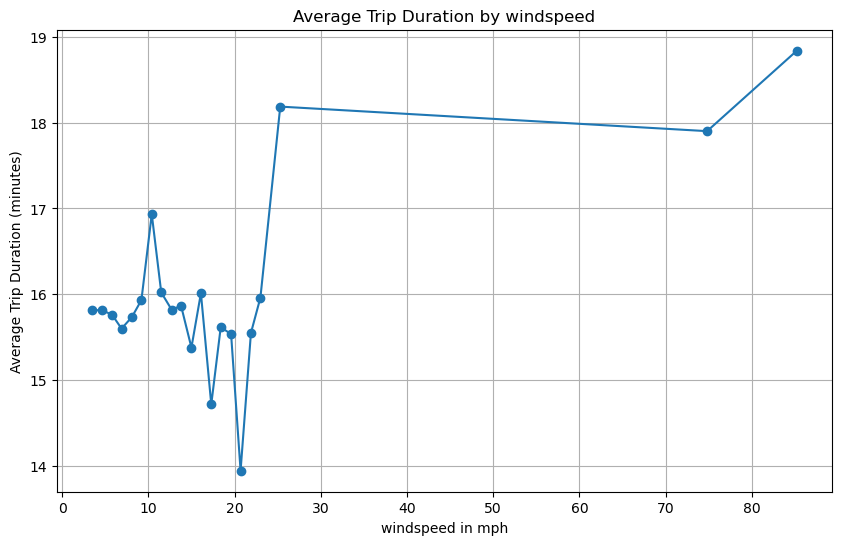

In [36]:
hourly_avg = train_weather.groupby('windspeed')['trip_duration_min'].mean()
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg.index, hourly_avg, marker='o', linestyle='-')
plt.title('Average Trip Duration by windspeed')
plt.xlabel('windspeed in mph')
plt.ylabel('Average Trip Duration (minutes)')
plt.grid(True)
plt.show()

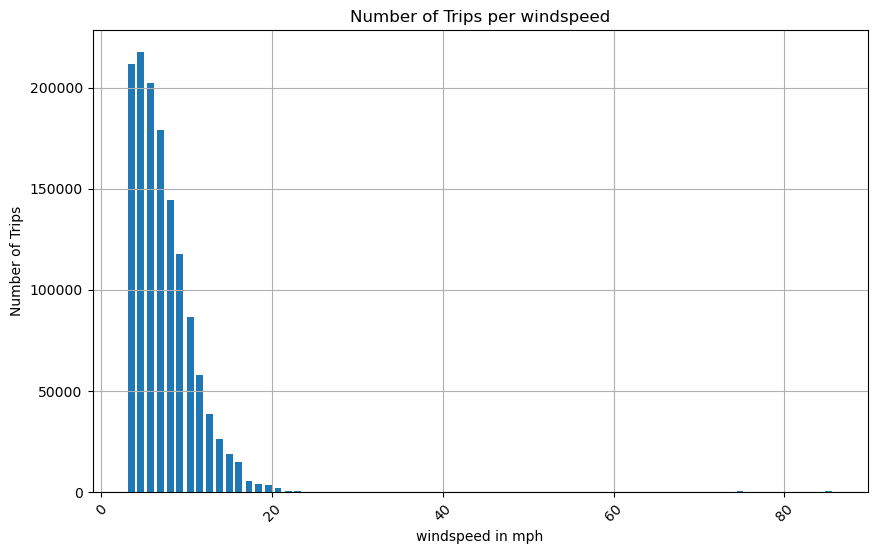

In [35]:
# Count the number of trips for each temperature
trip_counts = train_weather.groupby('windspeed').size()

# Plot the trip counts using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(trip_counts.index, trip_counts)
plt.title('Number of Trips per windspeed')
plt.xlabel('windspeed in mph')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(True)
plt.show() 


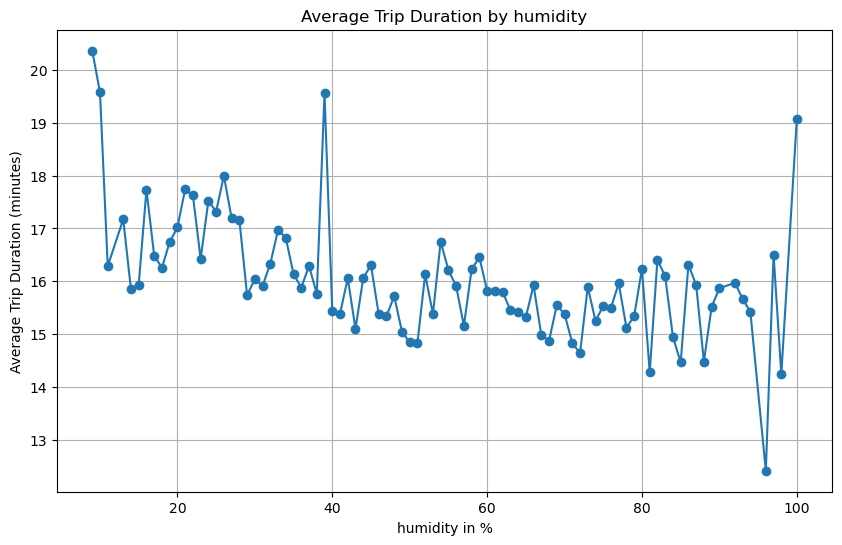

In [34]:
hourly_avg = train_weather.groupby('humidity')['trip_duration_min'].mean()
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg.index, hourly_avg, marker='o', linestyle='-')
plt.title('Average Trip Duration by humidity')
plt.xlabel('humidity in %')
plt.ylabel('Average Trip Duration (minutes)')
plt.grid(True)
plt.show()

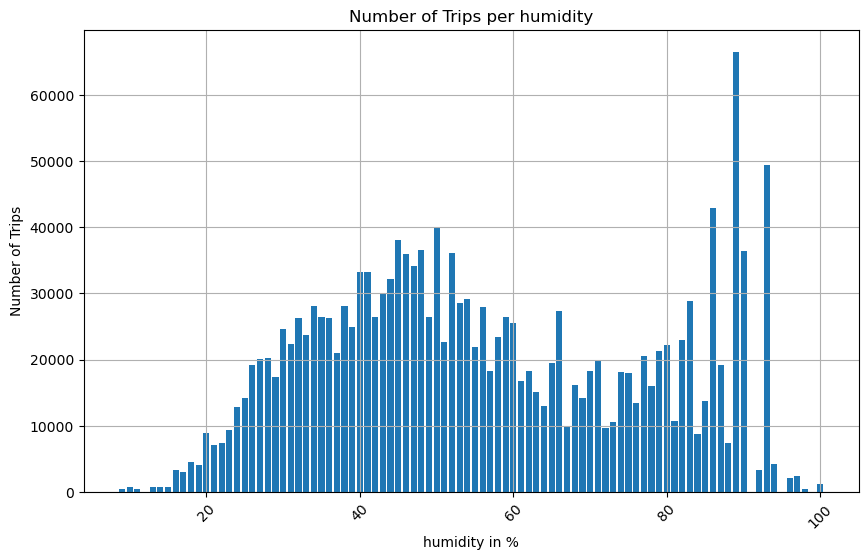

In [32]:
# Count the number of trips for each temperature
trip_counts = train_weather.groupby('humidity').size()

# Plot the trip counts using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(trip_counts.index, trip_counts)
plt.title('Number of Trips per humidity')
plt.xlabel('humidity in %')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(True)
plt.show() 

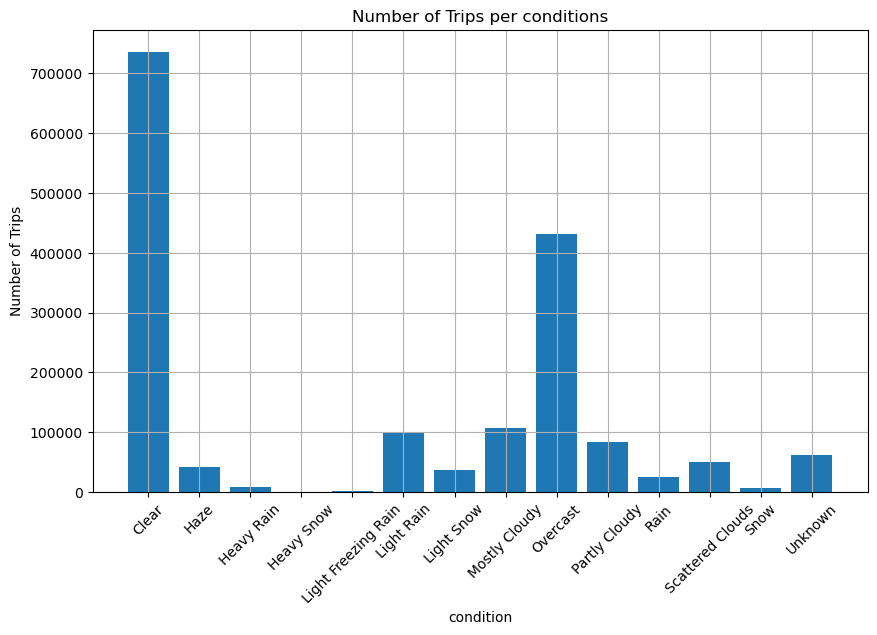

In [37]:
# Count the number of trips for each temperature
trip_counts = train_weather.groupby('conditions').size()

# Plot the trip counts using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(trip_counts.index, trip_counts)
plt.title('Number of Trips per conditions')
plt.xlabel('condition')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(True)
plt.show() 

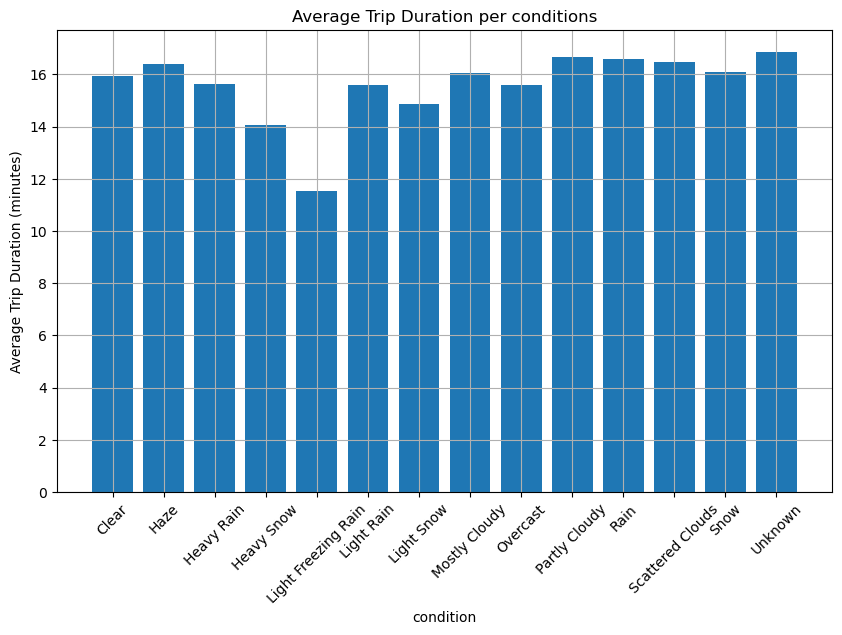

In [40]:
trip_counts = train_weather.groupby('conditions')['trip_duration_min'].mean()

# Plot the trip counts using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(trip_counts.index, trip_counts)
plt.title('Average Trip Duration per conditions')
plt.xlabel('condition')
plt.ylabel('Average Trip Duration (minutes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show() 